<a href="https://colab.research.google.com/github/316104127/classifications_diabetes/blob/main/classifications_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importações / Atualizações

In [26]:
!pip install plotly --upgrade

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt


pd.set_option('float_format','{:.2f}'.format)

In [28]:
path1 ='/content/drive/MyDrive/2022/Kaggle/classifications/heart.csv'

In [29]:
heart = pd.read_csv(path1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


## Observações

In [30]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


In [31]:
heart.rename(columns={'age':'Idade','sex':'Genero','cp':'Dor_Peito','trestbps':'Pres_Art_Rep','chol':'colesterol','fbs':'Glicemia_Jejum','restecg':'R_EletrCardioGrafic_Rep','thalach':'Max_freq_Card',
                      'exang':'Angina_Indu_Exerc','oldpeak':'Depre_ST_Ind__Exerc_Rep','slope':'Incli_ST_Exerc_Pic','ca':'Num_Vasos_Prin'}, inplace=True)

In [32]:
heart.describe()

,Idade,Genero,Dor_Peito,Pres_Art_Rep,colesterol,Glicemia_Jejum,R_EletrCardioGrafic_Rep,Max_freq_Card,Angina_Indu_Exerc,Depre_ST_Ind__Exerc_Rep,Incli_ST_Exerc_Pic,Num_Vasos_Prin,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [33]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    303 non-null    int64  
 1   Genero                   303 non-null    int64  
 2   Dor_Peito                303 non-null    int64  
 3   Pres_Art_Rep             303 non-null    int64  
 4   colesterol               303 non-null    int64  
 5   Glicemia_Jejum           303 non-null    int64  
 6   R_EletrCardioGrafic_Rep  303 non-null    int64  
 7   Max_freq_Card            303 non-null    int64  
 8   Angina_Indu_Exerc        303 non-null    int64  
 9   Depre_ST_Ind__Exerc_Rep  303 non-null    float64
 10  Incli_ST_Exerc_Pic       303 non-null    int64  
 11  Num_Vasos_Prin           303 non-null    int64  
 12  thal                     303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [34]:
heart

,Idade,Genero,Dor_Peito,Pres_Art_Rep,colesterol,Glicemia_Jejum,R_EletrCardioGrafic_Rep,Max_freq_Card,Angina_Indu_Exerc,Depre_ST_Ind__Exerc_Rep,Incli_ST_Exerc_Pic,Num_Vasos_Prin,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


## Idades mais frequentes

In [35]:
#Idade Máxima
heart['Idade'].max()

77

In [36]:
#Idade Mínima
heart['Idade'].min()

29

Média e Mediana das idades

In [37]:
heart['Idade'].mean()

54.366336633663366

In [38]:
heart['Idade'].median()

55.0

In [39]:
#Crio um dataset com a contagem das idades para saber as mais frequentes
heart_qtd_idade = pd.DataFrame(heart['Idade'].value_counts()).reset_index()
heart_qtd_idade.rename(columns={'Idade':'QTD','index':'Idade'}, inplace=True)

In [40]:
fig = px.bar(heart_qtd_idade, x='Idade', y='QTD',color='Idade', text='QTD', barmode="relative")#.update_xaxes(categoryorder='total ascending')
fig.update_layout(title='Idades mais frequentes', title_font_size=20, title_font_color='goldenrod')
fig

## Gêneros e a variança de dor e diagnóstico 

In [44]:
heart['Genero'].value_counts()

1    207
0     96
Name: Genero, dtype: int64

In [17]:
heart_idade_genero = heart.groupby(['Genero','Dor_Peito','target'], as_index=False).sum().drop(columns=['Pres_Art_Rep','Idade', 'colesterol','Glicemia_Jejum','R_EletrCardioGrafic_Rep','Max_freq_Card','Angina_Indu_Exerc','Depre_ST_Ind__Exerc_Rep','Incli_ST_Exerc_Pic','Num_Vasos_Prin','thal']).reset_index()
heart_idade_genero['Genero'].replace(0,'Mulher',inplace=True)
heart_idade_genero['Genero'].replace(1,'Homem',inplace=True)

In [18]:
fig = px.bar(heart_idade_genero, x='Genero', y='Dor_Peito', color='target',text='Dor_Peito')#.update_xaxes(categoryorder='total ascending')
fig.update_layout(title='Gêneros X Dores no Peito x Resultado dos Exames ', title_font_size=20, title_font_color='goldenrod')
fig

In [19]:
heart_genero_dor1 = heart.loc[heart.Dor_Peito==1]
heart_genero_dor1_group = heart_genero_dor1.groupby(['Genero'], as_index=False).sum().drop(columns=['target','Pres_Art_Rep','Idade', 'colesterol','Glicemia_Jejum','R_EletrCardioGrafic_Rep','Max_freq_Card','Angina_Indu_Exerc','Depre_ST_Ind__Exerc_Rep','Incli_ST_Exerc_Pic','Num_Vasos_Prin','thal']).reset_index()
heart_genero_dor1_group['Genero'].replace({0:'Mulher'}, inplace=True)
heart_genero_dor1_group['Genero'].replace({1:'Homem'}, inplace=True)



heart_genero_dor2 = heart.loc[heart.Dor_Peito==2]
heart_genero_dor2_group = heart_genero_dor2.groupby(['Genero'], as_index=False).sum().drop(columns=['target','Pres_Art_Rep','Idade', 'colesterol','Glicemia_Jejum','R_EletrCardioGrafic_Rep','Max_freq_Card','Angina_Indu_Exerc','Depre_ST_Ind__Exerc_Rep','Incli_ST_Exerc_Pic','Num_Vasos_Prin','thal']).reset_index()
heart_genero_dor2_group['Genero'].replace({0:'Mulher'}, inplace=True)
heart_genero_dor2_group['Genero'].replace({1:'Homem'}, inplace=True)

heart_genero_dor3 = heart.loc[heart.Dor_Peito==3]
heart_genero_dor3_group = heart_genero_dor3.groupby(['Genero'], as_index=False).sum().drop(columns=['target','Pres_Art_Rep','Idade', 'colesterol','Glicemia_Jejum','R_EletrCardioGrafic_Rep','Max_freq_Card','Angina_Indu_Exerc','Depre_ST_Ind__Exerc_Rep','Incli_ST_Exerc_Pic','Num_Vasos_Prin','thal']).reset_index()
heart_genero_dor3_group['Genero'].replace({0:'Mulher'}, inplace=True)
heart_genero_dor3_group['Genero'].replace({1:'Homem'}, inplace=True)


Dores Nível 1

In [20]:
fig = px.bar(heart_genero_dor1_group, x='Genero', y='Dor_Peito', color='Genero',text='Dor_Peito')#.update_xaxes(categoryorder='total ascending')
fig.update_layout(title='Gênero com mais dores no peito igual a nível 1', title_font_size=20, title_font_color='goldenrod')
fig

Dores Nível 2

In [21]:
fig = px.bar(heart_genero_dor2_group, x='Genero', y='Dor_Peito', color='Genero',text='Dor_Peito')#.update_xaxes(categoryorder='total ascending')
fig.update_layout(title='Gênero com mais dores no peito igual a nível 2', title_font_size=20, title_font_color='goldenrod')
fig

Dores Nível 3

In [22]:
fig = px.bar(heart_genero_dor3_group, x='Genero', y='Dor_Peito', color='Genero',text='Dor_Peito')#.update_xaxes(categoryorder='total ascending')
fig.update_layout(title='Gênero com mais dores no peito igual a nível 3', title_font_size=20, title_font_color='goldenrod')
fig

In [23]:
#Crio um dataset com as informações das dores juntas
heart_genero_dor1_group_geral = heart_genero_dor1_group
heart_genero_dor1_group_geral = heart_genero_dor1_group_geral.merge(heart_genero_dor2_group, on='Genero')
heart_genero_dor1_group_geral = heart_genero_dor1_group_geral.merge(heart_genero_dor3_group, on='Genero')
heart_genero_dor1_group_geral.rename(columns={'Dor_Peito_x':'Nivel_1','Dor_Peito_y':'Nivel_2','Dor_Peito':'Nivel_3'}, inplace=True)
heart_genero_dor1_group_geral.drop(columns=['index', 'index_y','index_x'], inplace=True)
#Transponho o dataset
heart_genero_dor1_group_geral_transposto = heart_genero_dor1_group_geral.transpose().reset_index()
heart_genero_dor1_group_geral_transposto.drop(0, inplace=True)
heart_genero_dor1_group_geral_transposto.rename(columns={'index':'Niveis',0:'Mulher',1:'Homem'}, inplace=True)

In [24]:
mulher = go.Bar(x = heart_genero_dor1_group_geral_transposto['Niveis'],
                y = heart_genero_dor1_group_geral_transposto['Mulher'],
               name = 'Mulher',
               marker = {'color': '#e377c2'})

homem = go.Bar(x = heart_genero_dor1_group_geral_transposto['Niveis'],
                y = heart_genero_dor1_group_geral_transposto['Homem'],
             name = 'Homem',
             marker = {'color': '#1f77b4'})

data = [mulher, homem]
py.iplot(data)

## Maiores Frequências

Mulheres possuem algumas frequências maiores como pressão arterial em repouso, colesterol, depressão por st indicada por excercício em repouso, e os homens número de vasos principais e frequência cardíaca.  

In [45]:
#crio dataset com os maiores valores
geral_infos_max = heart.groupby('Genero').max().drop(columns=['thal','target']).reset_index()
geral_infos_max['Genero'].replace(0,'Mulher', inplace=True)
geral_infos_max['Genero'].replace(1,'Homem', inplace=True)
#Transponho o dataset


geral_infos_max_transposto =  geral_infos_max.transpose().reset_index()
geral_infos_max_transposto.rename(columns={0:'Mulher',1:'Homem','index':'Infos'}, inplace=True)
geral_infos_max_transposto.drop(0,inplace=True)

mulher = go.Bar(x = geral_infos_max_transposto['Infos'],
                y = geral_infos_max_transposto['Mulher'],
               name = 'Mulher',text=geral_infos_max_transposto['Mulher'],                
               marker = {'color': '#e377c2'})

homem = go.Bar(x = geral_infos_max_transposto['Infos'],
                y = geral_infos_max_transposto['Homem'],
               name = 'Homem',text=geral_infos_max_transposto['Homem'], 
               marker = {'color': '#1f77b4'})

data2 = [mulher,homem]
py.iplot(data2)


## ML

In [46]:
heart

,Idade,Genero,Dor_Peito,Pres_Art_Rep,colesterol,Glicemia_Jejum,R_EletrCardioGrafic_Rep,Max_freq_Card,Angina_Indu_Exerc,Depre_ST_Ind__Exerc_Rep,Incli_ST_Exerc_Pic,Num_Vasos_Prin,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


In [47]:
heart.isna().values.any()

False

In [48]:
heart.isnull().values.any()

False

In [49]:
#Função de correlação, 'Ideias relacionadas entre si'
def plot_corr(df,size=10):
    corr = df.corr()
    fig,  ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

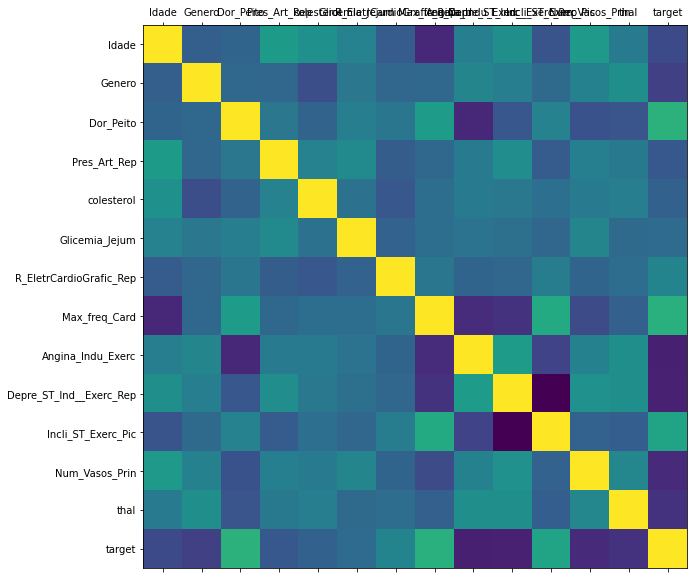

In [50]:
plot_corr(heart)

In [51]:
heart.corr()

,Idade,Genero,Dor_Peito,Pres_Art_Rep,colesterol,Glicemia_Jejum,R_EletrCardioGrafic_Rep,Max_freq_Card,Angina_Indu_Exerc,Depre_ST_Ind__Exerc_Rep,Incli_ST_Exerc_Pic,Num_Vasos_Prin,thal,target
Idade,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
Genero,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
Dor_Peito,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
Pres_Art_Rep,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
colesterol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
Glicemia_Jejum,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
R_EletrCardioGrafic_Rep,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
Max_freq_Card,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
Angina_Indu_Exerc,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
Depre_ST_Ind__Exerc_Rep,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


1° Tentativa de classificação com todas as informações do dataset

Exatidão Treino: 0.8632 / Exatidão Teste: 0.8242 / Accuracy: 0.82

-

2° Tentativa retirado alguns atributos, idade e genero.

Sem diferenças plausíveis

-

3° Tentativa alterando os valores zeros para média.

Sem diferenças plausíveis

In [59]:
#Seleciono os meus atributos para a classificação
atributos = ['Idade','Genero','Dor_Peito','Pres_Art_Rep','colesterol','Glicemia_Jejum','R_EletrCardioGrafic_Rep','Max_freq_Card','Angina_Indu_Exerc','Depre_ST_Ind__Exerc_Rep','Incli_ST_Exerc_Pic','Num_Vasos_Prin','thal']
atributo_previsor = ['target']
#Pego os valores
X = heart[atributos].values
Y = heart[atributo_previsor].values
#Separo meus valores para teste e treino
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=30)
#Escolho o modelo 
modelo = LogisticRegression(max_iter=1000)
#Treino
modelo.fit(X_treino, Y_treino.ravel())
#Verifico os resultado
lr_predict_test = modelo.predict(X_teste)
rf_predict_train = modelo.predict(X_treino)


In [60]:
print("Exatidão Treino (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão Treino (Accuracy): 0.8632


In [61]:
print("Exatidão Teste (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))


Exatidão Teste (Accuracy): 0.8242


In [62]:
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.80      0.84        51
           0       0.77      0.85      0.81        40

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



In [115]:
#Salvo  o modelo de teste.
filename = 'modelo_treinado.sav'
pickle.dump(modelo, open(filename, 'wb'))
#Carrego o modelo e fazendo previsão com novos conjuntos de dados 
loaded_model = pickle.load(open(filename, 'rb'))

i = 0

print(f"{X_teste[i][1]}")
#Visualização dos resultados
for valor in X_teste:
    resultado = loaded_model.predict(X_teste[i].reshape(1, -1))
    print(f"Idade: {X_teste[i][0]} / Gênero: {X_teste[i][1]} / Nível de dor no peito: {X_teste[i][2]} / Presssão Arterial em repouso: {X_teste[i][3]} / Colesterol: {X_teste[i][4]} / Glicemia em jejum: {X_teste[i][5]} / \n Resultado do eletro cardiograma em repouso: {X_teste[i][6]} / Maxima frequência cardíaca: {X_teste[i][7]} / Angina induzida por exercício: {X_teste[i][8]} / \n Depre_ST_Ind__Exerc_Rep: {X_teste[i][9]} / Inclinação do segmento ST de exercício de pico: {X_teste[i][10]} / Número de vasos princpais: thal: {X_teste[i][11]}")

    print(f"Resultado: {resultado} \n\n")
    i += 1

1.0
Idade: 52.0 / Gênero: 1.0 / Nível de dor no peito: 0.0 / Presssão Arterial em repouso: 108.0 / Colesterol: 233.0 / Glicemia em jejum: 1.0 / 
 Resultado do eletro cardiograma em repouso: 1.0 / Maxima frequência cardíaca: 147.0 / Angina induzida por exercício: 0.0 / 
 Depre_ST_Ind__Exerc_Rep: 0.1 / Inclinação do segmento ST de exercício de pico: 2.0 / Número de vasos princpais: thal: 3.0
Resultado: [0] 


Idade: 41.0 / Gênero: 0.0 / Nível de dor no peito: 2.0 / Presssão Arterial em repouso: 112.0 / Colesterol: 268.0 / Glicemia em jejum: 0.0 / 
 Resultado do eletro cardiograma em repouso: 0.0 / Maxima frequência cardíaca: 172.0 / Angina induzida por exercício: 1.0 / 
 Depre_ST_Ind__Exerc_Rep: 0.0 / Inclinação do segmento ST de exercício de pico: 2.0 / Número de vasos princpais: thal: 0.0
Resultado: [1] 


Idade: 42.0 / Gênero: 0.0 / Nível de dor no peito: 0.0 / Presssão Arterial em repouso: 102.0 / Colesterol: 265.0 / Glicemia em jejum: 0.0 / 
 Resultado do eletro cardiograma em repou

In [64]:
X_teste

array([[52.,  1.,  0., ...,  2.,  3.,  3.],
       [41.,  0.,  2., ...,  2.,  0.,  2.],
       [42.,  0.,  0., ...,  1.,  0.,  2.],
       ...,
       [43.,  1.,  0., ...,  1.,  0.,  3.],
       [48.,  1.,  1., ...,  1.,  0.,  2.],
       [61.,  1.,  2., ...,  1.,  0.,  2.]])

In [210]:
#Idade / Genero / Dor_Peito / Pres_Art_Rep / colesterol / Glicemia_Jejum / R_EletrCardioGrafic_Rep / Max_freq_Card / Angina_Indu_Exerc / Depre_ST_Ind__Exerc_Rep / Incli_ST_Exerc_Pic / Num_Vasos_Prin / thal


atributos_teste = np.array([[63,0,0,145,233,1,0,150,0,2.30,0,0,1],
                            [63,1,0,145,233,1,0,150,0,2.30,0,0,1]])	


resultado1 = modelo.predict(atributos_teste[0].reshape(1, -1))
resultado2 = modelo.predict(atributos_teste[1].reshape(1, -1))

In [211]:
resultado1

array([1])

In [212]:
resultado2

array([0])

In [222]:
atributos_teste2 = np.array([[58,0,2,140,211,1,0,165,0,2.20,2,0,1],
                             [58,0,2,140,211,1,0,165,0,2.20,2,0,1]])	


resultado1 = modelo.predict(atributos_teste2[0].reshape(1, -1))
resultado2 = modelo.predict(atributos_teste2[1].reshape(1, -1))



In [223]:
resultado1

array([1])

In [224]:
resultado2

array([1])